# Deep Learning - Plots

This notebook extracts the loss values from the log files and plots them.

## Read Log File

Extract only the final lines of each epoch.

In [8]:
log_file_path = 'logs/slurm-67.out'

search_strings = ["monet_gen_loss", "439/439"]
exclude_string = "ETA"

lines = []

In [9]:
with open(log_file_path, 'r') as log_file:
    for line in log_file:
        if all(search_string in line for search_string in search_strings) and exclude_string not in line:
             l = line.strip()  # Print the line without leading/trailing whitespace
             lines.append(l)
             print(l)

439/439 [==============================] - 1360s 3s/step - monet_gen_loss: 0.9709 - photo_gen_loss: 0.9640 - monet_disc_loss: 0.6827 - photo_disc_loss: 0.6859


## Extract Loss Values 

In [10]:
# Define the regular expression pattern to match the loss values
loss_pattern = r"monet_gen_loss: (\d+\.\d+).*photo_gen_loss: (\d+\.\d+).*monet_disc_loss: (\d+\.\d+).*photo_disc_loss: (\d+\.\d+)"

# Initialize lists to store the extracted loss values
monet_gen_losses = []
photo_gen_losses = []
monet_disc_losses = []
photo_disc_losses = []

In [11]:
import re

for line in lines:
    match = re.search(loss_pattern, line)
    if match:
        monet_gen_losses.append(float(match.group(1)))
        photo_gen_losses.append(float(match.group(2)))
        monet_disc_losses.append(float(match.group(3)))
        photo_disc_losses.append(float(match.group(4)))

In [12]:
# Print the extracted loss values
print("Monet Gen Losses:", monet_gen_losses)
print("Photo Gen Losses:", photo_gen_losses)
print("Monet Disc Losses:", monet_disc_losses)
print("Photo Disc Losses:", photo_disc_losses)

Monet Gen Losses: [1.7022, 1.3364, 1.2966, 1.2738, 1.2558, 1.2399, 1.2029, 1.1534, 1.1241, 1.1035, 1.0843, 1.0723, 1.057, 1.0468, 1.0408, 1.0349, 1.0287, 1.0274, 1.0252, 1.0217, 1.0172, 1.0142, 1.008, 1.0076, 0.9987, 0.9917, 0.9864, 0.9796, 0.9746, 0.9709]
Photo Gen Losses: [1.7159, 1.3604, 1.314, 1.2817, 1.2601, 1.2395, 1.1995, 1.1483, 1.118, 1.097, 1.0769, 1.064, 1.0505, 1.0421, 1.0372, 1.0332, 1.0276, 1.0241, 1.0204, 1.0161, 1.0106, 1.0075, 1.0027, 1.0005, 0.9933, 0.9851, 0.9786, 0.9727, 0.9678, 0.964]
Monet Disc Losses: [0.689, 0.6897, 0.6896, 0.689, 0.6896, 0.6887, 0.6886, 0.6872, 0.6867, 0.687, 0.6867, 0.6864, 0.6877, 0.6872, 0.6869, 0.6873, 0.6867, 0.6854, 0.6851, 0.6846, 0.6852, 0.685, 0.6854, 0.6843, 0.685, 0.6838, 0.6828, 0.6835, 0.6834, 0.6827]
Photo Disc Losses: [0.6822, 0.6803, 0.6838, 0.687, 0.6879, 0.6893, 0.6904, 0.6901, 0.6898, 0.6902, 0.6904, 0.6901, 0.6901, 0.6887, 0.6877, 0.6868, 0.6864, 0.6863, 0.6868, 0.6878, 0.6877, 0.6878, 0.6874, 0.6875, 0.687, 0.6867, 0.6865, 

## Plot Losses

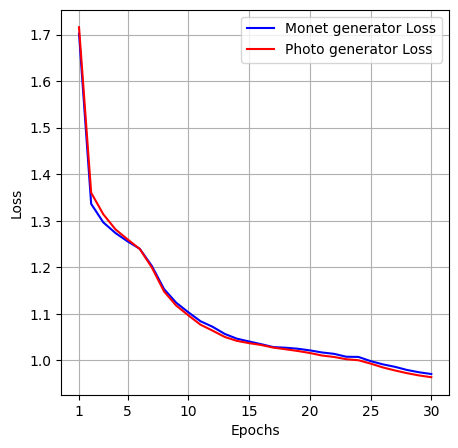

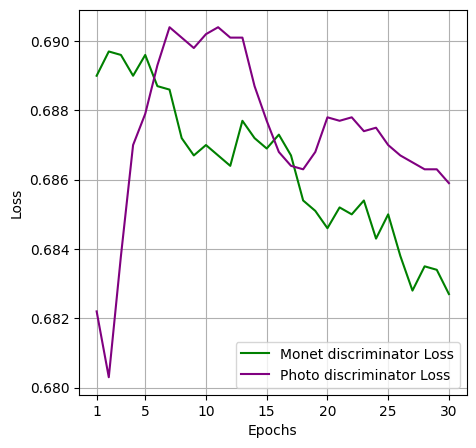

In [13]:
import matplotlib.pyplot as plt

epochs = range(1, len(monet_gen_losses) + 1)
xticks = [1, 5, 10, 15, 20, 25, 30]

# Create a separate figure for the generator losses
plt.figure(figsize=(5, 5))
plt.plot(epochs, monet_gen_losses, label='Monet generator Loss', color='blue')
plt.plot(epochs, photo_gen_losses, label='Photo generator Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.xticks(xticks)
plt.legend()
plt.show()

# Create a separate figure for the discriminator losses
plt.figure(figsize=(5, 5))
plt.plot(epochs, monet_disc_losses, label='Monet discriminator Loss', color='green')
plt.plot(epochs, photo_disc_losses, label='Photo discriminator Loss', color='purple')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.xticks(xticks)
plt.legend()
plt.show()